In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 9.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=3f5fdb1d74d90d38967e5fbe2ca91462af4cfd18f65aa13c879fba5e792ae41d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


4.3191511759785035


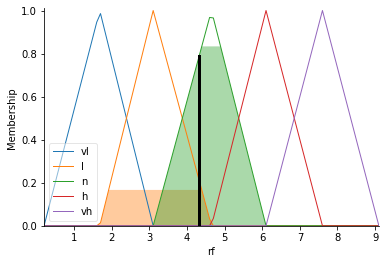

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
ws = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'ws')
tp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'tp')
rf = ctrl.Consequent(np.arange(0.2,9.2,0.1),'rf')

ws['vl'] = fuzz.trimf(ws.universe,[0.7,0.7,1.3])
ws['l'] = fuzz.trimf(ws.universe,[0.7,1.3,1.9])
ws['n'] = fuzz.trimf(ws.universe,[1.3,1.9,2.5])
ws['h'] = fuzz.trimf(ws.universe,[1.9,2.5,3.1])
ws['vh'] = fuzz.trimf(ws.universe,[2.5,3.1,3.1])
tp['vl'] = fuzz.trimf(tp.universe,[20.4,20.4,25.6])
tp['l'] = fuzz.trimf(tp.universe,[20.4,25.6,30.8])
tp['n'] = fuzz.trimf(tp.universe,[25.6,30.8,36])
tp['h'] = fuzz.trimf(tp.universe,[30.8,36,41.2])
tp['vh'] = fuzz.trimf(tp.universe,[36,41.2,41.2])
rf['vl'] = fuzz.trimf(rf.universe,[0.2,1.68,3.1])
rf['l'] = fuzz.trimf(rf.universe,[1.68,3.1,4.65])
rf['n'] = fuzz.trimf(rf.universe,[3.1,4.65,6.1])
rf['h'] = fuzz.trimf(rf.universe,[4.65,6.1,7.6])
rf['vh'] = fuzz.trimf(rf.universe,[6.1,7.6,9.1])

rule1= ctrl.Rule(ws['vl']&tp['vl'],rf['vl'])
rule2= ctrl.Rule(ws['vl']&tp['l'],rf['vl'])
rule3= ctrl.Rule(ws['vl']&tp['n'],rf['vl'])
rule4= ctrl.Rule(ws['vl']&tp['h'],rf['vl'])
rule5= ctrl.Rule(ws['vl']&tp['vh'],rf['vl'])

rule6= ctrl.Rule(ws['l']&tp['vl'],rf['vl'])
rule7= ctrl.Rule(ws['l']&tp['l'],rf['vl'])
rule8= ctrl.Rule(ws['l']&tp['n'],rf['l'])
rule9= ctrl.Rule(ws['l']&tp['h'],rf['l'])
rule10= ctrl.Rule(ws['l']&tp['vh'],rf['n'])

rule11= ctrl.Rule(ws['n']&tp['vl'],rf['l'])
rule12= ctrl.Rule(ws['n']&tp['l'],rf['l'])
rule13= ctrl.Rule(ws['n']&tp['n'],rf['n'])
rule14= ctrl.Rule(ws['n']&tp['h'],rf['n'])
rule15= ctrl.Rule(ws['n']&tp['vh'],rf['h'])

rule16= ctrl.Rule(ws['h']&tp['vl'],rf['l'])
rule17= ctrl.Rule(ws['h']&tp['l'],rf['n'])
rule18= ctrl.Rule(ws['h']&tp['n'],rf['n'])
rule19= ctrl.Rule(ws['h']&tp['h'],rf['h'])
rule20= ctrl.Rule(ws['h']&tp['vh'],rf['vh'])

rule21= ctrl.Rule(ws['vh']&tp['vl'],rf['l'])
rule22= ctrl.Rule(ws['vh']&tp['l'],rf['n'])
rule23= ctrl.Rule(ws['vh']&tp['n'],rf['h'])
rule24= ctrl.Rule(ws['vh']&tp['h'],rf['vh'])
rule25= ctrl.Rule(ws['vh']&tp['vh'],rf['vh'])

rf_rule=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfall= ctrl.ControlSystemSimulation(rf_rule)
rainfall.input['ws']=1.8
rainfall.input['tp']=31
rainfall.compute()
print(rainfall.output['rf'])
rf.view(sim=rainfall)

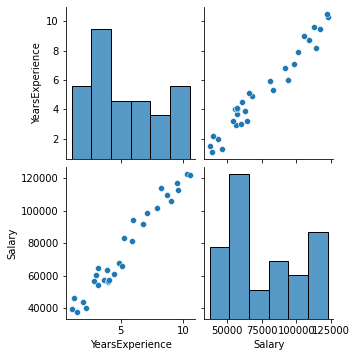

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
data=pd.read_csv('/content/Salary_Data.csv')
data.head()
X=data.drop(['Salary'],axis=True)
y=data['Salary']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
sns.pairplot(data)


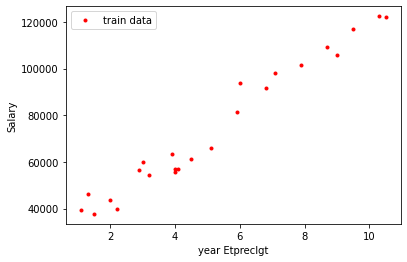

In [ ]:
plt.plot(X_train,y_train,'r.',label='train data')
plt.xlabel('year Etpreclgt')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test).round(1)
Col = pd.DataFrame(np.c_[y_test,y_pred],columns=['Original Salary','Predicted Salary'])
Col
print('Coeffient',model.coef_)
print('Intercepet',model.intercept_)
print('Accuracy',model.score(X_train,y_train))


Coeffient [9423.81532303]
Intercepet 25321.583011776813
Accuracy 0.9645401573418146


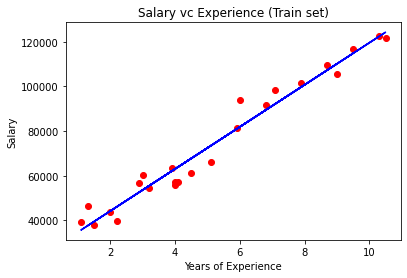

In [ ]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.title('Salary vc Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()